# Coded Data Viz and Exploration
This Jupyter notebook is mainly to look at my data now that it has been qualitatively coded!
This is a new, continuing script.  

**Contents**
- [1 Qualitative Coding](#1-Qualitative-Coding)
- [2 Exploration of the algospeak data](#2-Exploration-of-the-algospeak-data)
- [3 Looking at the unalive dataset](#3-Looking-at-the-unalive-dataset)
  - [3.1 Looking at replace_code and topic_code](#3.1-Looking-at-replace_code-and-topic_code)

## 1 Qualitative Coding
Unlike coding with something like Python, qualitative coding here is basically just giving an item a discrete value based on some property. In this project, I am looking at how people use algopseak, so my the codes listed in the mention_code column of my CSV/dataframe are split up into four categories of use. 
| Code      | Meaning                                                                                                               |
|-----------|-----------------------------------------------------------------------------------------------------------------------|
| a         | algospeak - The term is being used to censor another term                                                             |
| m         | mention - The term is being mentioned as an algospeak term but not used to censor anything. Can also stand for "meta" |
| n         | not algospeak - The term is not being used as an algospeak term                                                       |
| o         | other - Term is not present or something else                                                                         |

## 2 Exploration of the algospeak data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pprint
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Pretty printing has been turned OFF


In [2]:
algo_df = pd.read_csv('algospeak_top_posts.csv')

In [3]:
# Here you can see the mention codes with context
algo_df[['text','query', 'mention_code']].sample(5)

,text,query,mention_code
92,"And just like that, our first egg of the year!",palm colored,o
54,"First sketch request of February, have some good old seggs with Cleopatra from Shin Megami Tensei V!",seggs,a
50,i promise i’m not trying to be a freaky frog but do yall laugh during seggs? \n\ni’m tryna see sumn.,seggs,a
136,Fuck you watermelon fucker. Nobody fucking asked you.,watermelon,n
121,A farm worker shared this photo with us from an Arizona watermelon field . It's physically demanding work. The loader crew is responsible for picking pick up hundreds of watermelons and loading them into the trailer. #WeFeedYou,watermelon,n


In [4]:
algo_df.mention_code.value_counts()

mention_code
a    49
n    48
o    41
m    10
Name: count, dtype: int64

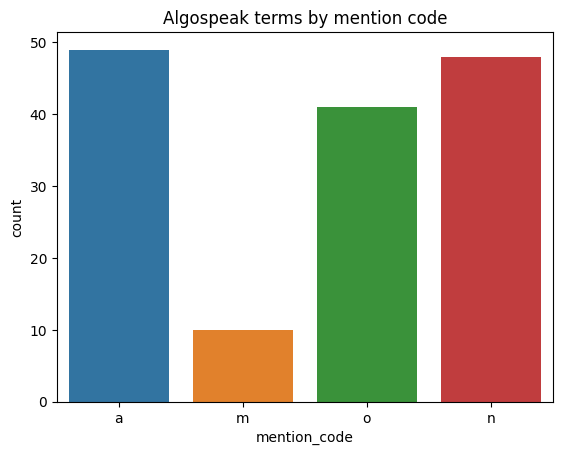

In [5]:
plot = sns.countplot(x = 'mention_code', hue='mention_code', data = algo_df).set_title('Algospeak terms by mention code')
plt.savefig('plots/terms_by_code.png')

You can see here that there wasn't a ton of metadiscourse about algopseak in this sample, but there is a lot of stuff that isn't algospeak here

In [6]:
code_by_term = algo_df.groupby('query').mention_code.value_counts().unstack()
code_by_term

mention_code,a,m,n,o
query,,,,
grape,NaN,NaN,27.0,3.0
palm colored,2.0,1.0,NaN,27.0
seggs,26.0,1.0,NaN,3.0
unalive,21.0,8.0,NaN,NaN
watermelon,NaN,NaN,21.0,8.0


In [7]:
code_by_term = code_by_term.fillna(0)
code_by_term

mention_code,a,m,n,o
query,,,,
grape,0.0,0.0,27.0,3.0
palm colored,2.0,1.0,0.0,27.0
seggs,26.0,1.0,0.0,3.0
unalive,21.0,8.0,0.0,0.0
watermelon,0.0,0.0,21.0,8.0


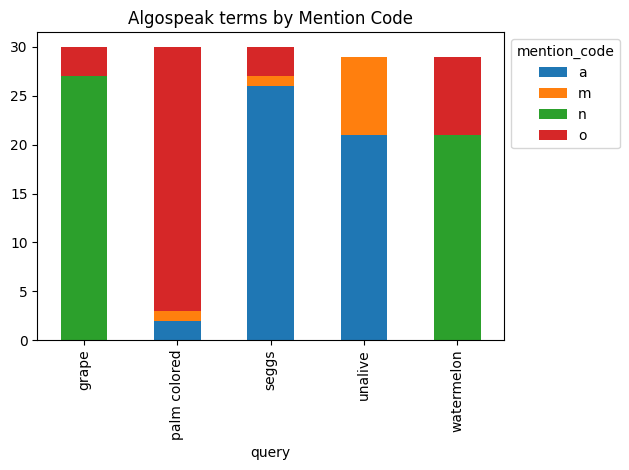

In [8]:
ax = code_by_term.plot(kind='bar', stacked=True)
ax.set_title('Algospeak terms by Mention Code')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('plots/terms_by_code_stacked.png')

There's a big difference between the terms! There are no algospeak uses for grape or watermelon here, and only a couple for palm-colored. Unalive is really the only term that is unambiguously algospeak in this small dataset.

## 3 Looking at the unalive dataset
Coded the same way but it's just unalive now

In [9]:
unalive_df = pd.read_csv('unalive_top_posts.csv')

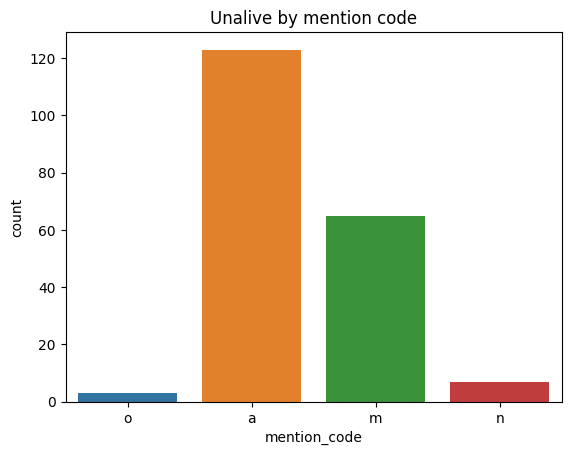

In [10]:
sns.countplot(x = 'mention_code', hue='mention_code', data = unalive_df).set_title('Unalive by mention code')
plt.savefig('plots/unalive_by_code.png')

In [11]:
likes_by_code = unalive_df.groupby('mention_code')[['likes', 'quotes', 'replies']].mean()
likes_by_code

,likes,quotes,replies
mention_code,,,
a,17.325203,0.373984,1.357724
m,42.692308,0.461538,2.215385
n,84.142857,0.857143,4.000000
o,56.333333,0.000000,0.000000


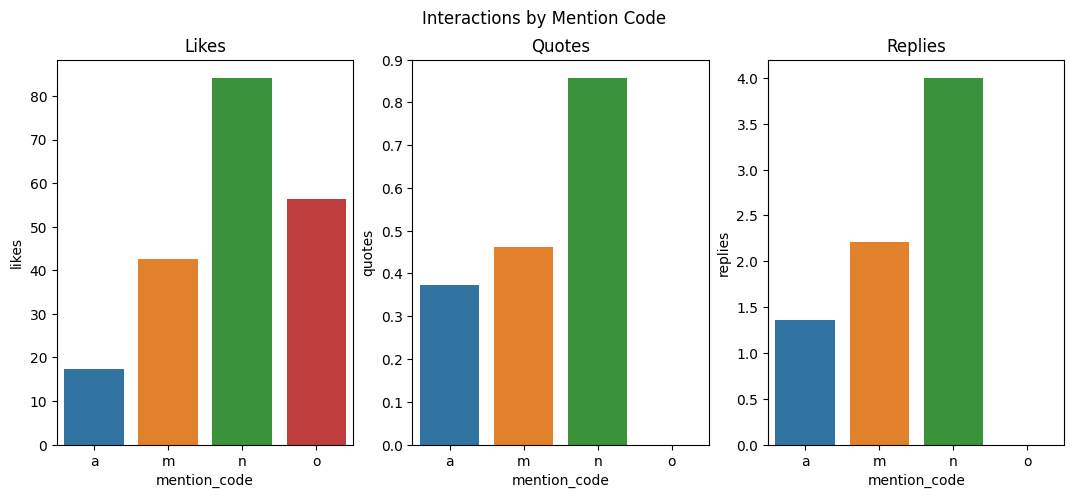

In [12]:
fig, ax = plt.subplots(1, 3, sharex = True, figsize=(13,5))
fig.suptitle('Interactions by Mention Code')
ax[0].set_title('Likes')
ax[1].set_title('Quotes')
ax[2].set_title('Replies')
sns.barplot(x = 'mention_code', y = 'likes', hue='mention_code', data=likes_by_code, ax=ax[0])
sns.barplot(x = 'mention_code', y = 'quotes', hue='mention_code', data=likes_by_code, ax=ax[1])
sns.barplot(x = 'mention_code', y = 'replies', hue='mention_code', data=likes_by_code, ax=ax[2])
plt.savefig('plots/interactions_by_mention_code.png')

### 3.1 Looking at replace_code and topic_code
I added some more columns of qualitative coding, the replace_code column and topic_code column.
- The replace_code column just contains what unalive is replacing/censoring if it is used in a sentence and not just mentioned.
      - For instance if the post says "I will unalive you" the replace_code is "kill".
- The topic_code column is the topic of the post. See code_book.txt for a full list of those.

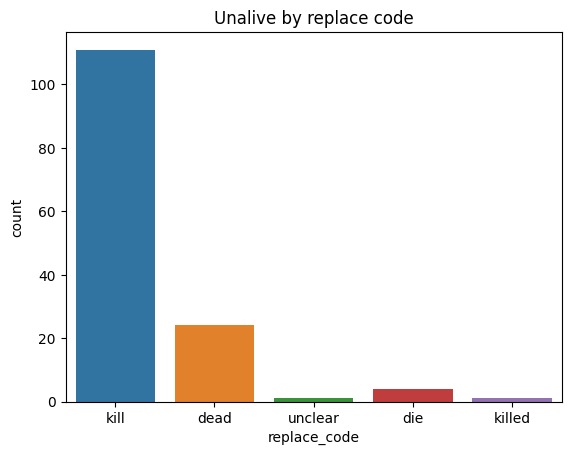

In [13]:
sns.countplot(x = 'replace_code', hue='replace_code', data = unalive_df, legend = False).set_title('Unalive by replace code')
plt.savefig('plots/replace_code.png')

It seems that it is mostly used to replace 'kill' though I do think it's interesting that it replaces both 'dead' and 'died'. 'Unalive' definitely has multiple word classes going on.

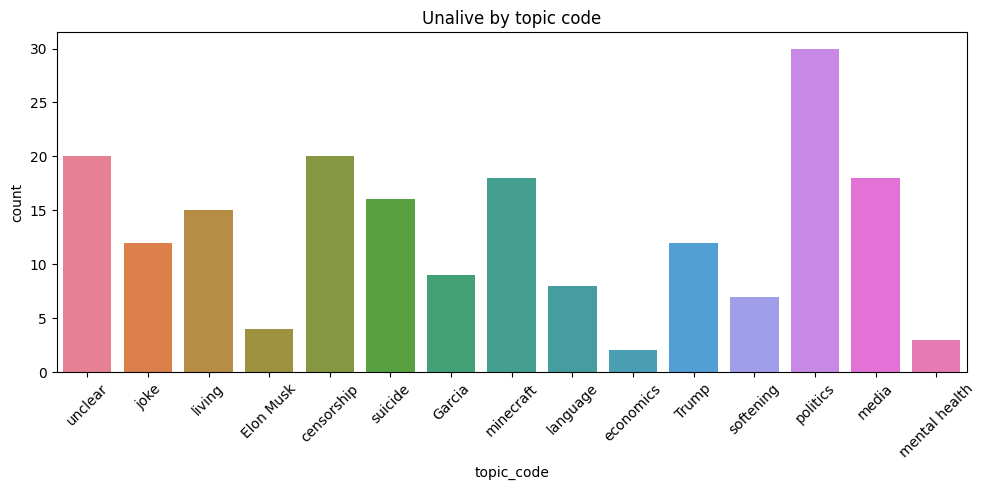

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = 'topic_code', hue='topic_code', data = unalive_df, legend=False, width = 0.8, ax=ax).set_title('Unalive by topic code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/topic_code.png')

A lot of politics, but that's par for the course on Bluesky

In [15]:
unalive_df.topic_code.value_counts()

topic_code
politics         30
unclear          20
censorship       20
minecraft        18
media            18
suicide          16
living           15
joke             12
Trump            12
Garcia            9
language          8
softening         7
Elon Musk         4
mental health     3
economics         2
Name: count, dtype: int64

In [16]:
topic_by_mention = unalive_df.groupby('topic_code').mention_code.value_counts().unstack().fillna(0)
topic_by_mention

mention_code,a,m,n,o
topic_code,,,,
Elon Musk,4.0,0.0,0.0,0.0
Garcia,9.0,0.0,0.0,0.0
Trump,12.0,0.0,0.0,0.0
censorship,0.0,20.0,0.0,0.0
economics,2.0,0.0,0.0,0.0
joke,7.0,5.0,0.0,0.0
language,1.0,7.0,0.0,0.0
living,15.0,0.0,0.0,0.0
media,13.0,5.0,0.0,0.0


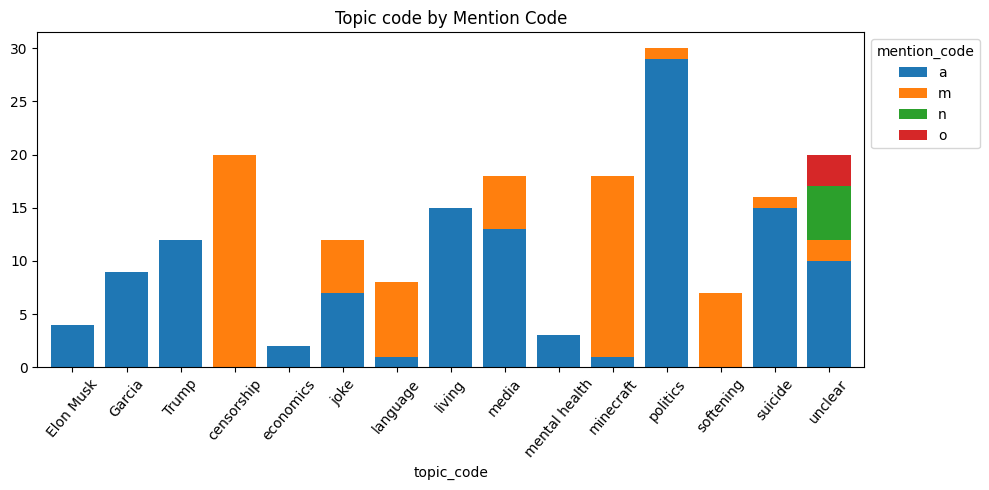

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))
topic_by_mention.plot(kind='bar', stacked=True, width = 0.8, ax=ax)
ax.set_title('Topic code by Mention Code')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation = 50)
plt.tight_layout()
plt.savefig('plots/topic_by_mention.png')